<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap19/19_2_Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 19.2: Dynamic programming**

This notebook investigates the dynamic programming approach to tabular reinforcement learning as described in figure 19.10 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Get local copies of components of images
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap19/Empty.png
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap19/Hole.png
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap19/Fish.png
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap19/Penguin.png

In [3]:
# Ugly class that takes care of drawing pictures like in the book.
# You can totally ignore this code!
class DrawMDP:
  # Constructor initializes parameters
  def __init__(self, n_row, n_col):
    self.empty_image = np.asarray(Image.open('Empty.png'))
    self.hole_image = np.asarray(Image.open('Hole.png'))
    self.fish_image = np.asarray(Image.open('Fish.png'))
    self.penguin_image = np.asarray(Image.open('Penguin.png'))
    self.fig,self.ax = plt.subplots()
    self.n_row = n_row
    self.n_col = n_col

    my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
    my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
    r = np.floor(my_colormap_vals_dec/(256*256))
    g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
    b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
    self.colormap = np.vstack((r,g,b)).transpose()/255.0


  def draw_text(self, text, row, col, position, color):
    if position == 'bc':
      self.ax.text( 83*col+41,83 * (row+1) -10, text, horizontalalignment="center", color=color, fontweight='bold')
    if position == 'tl':
      self.ax.text( 83*col+5,83 * row +5, text, verticalalignment = 'top', horizontalalignment="left", color=color, fontweight='bold')
    if position == 'tr':
      self.ax.text( 83*(col+1)-5, 83 * row +5, text, verticalalignment = 'top', horizontalalignment="right", color=color, fontweight='bold')

  # Draws a set of states
  def draw_path(self, path, color1, color2):
    for i in range(len(path)-1):
      row_start = np.floor(path[i]/self.n_col)
      row_end = np.floor(path[i+1]/self.n_col)
      col_start = path[i] - row_start * self.n_col
      col_end = path[i+1] - row_end * self.n_col

      color_index = int(np.floor(255 * i/(len(path)-1.)))
      self.ax.plot([col_start * 83+41 + i, col_end * 83+41 + i ],[row_start * 83+41 +  i, row_end * 83+41 + i ], color=(self.colormap[color_index,0],self.colormap[color_index,1],self.colormap[color_index,2]))


  # Draw deterministic policy
  def draw_deterministic_policy(self,i, action):
      row = np.floor(i/self.n_col)
      col = i - row * self.n_col
      center_x = 83 * col + 41
      center_y = 83 * row + 41
      arrow_base_width = 10
      arrow_height = 15
      # Draw arrow pointing upward
      if action ==0:
          triangle_indices = np.array([[center_x, center_y-arrow_height/2],
                              [center_x - arrow_base_width/2, center_y+arrow_height/2],
                              [center_x + arrow_base_width/2, center_y+arrow_height/2]])
      # Draw arrow pointing right
      if action ==1:
          triangle_indices = np.array([[center_x + arrow_height/2, center_y],
                              [center_x - arrow_height/2, center_y-arrow_base_width/2],
                              [center_x - arrow_height/2, center_y+arrow_base_width/2]])
      # Draw arrow pointing downward
      if action ==2:
          triangle_indices = np.array([[center_x, center_y+arrow_height/2],
                              [center_x - arrow_base_width/2, center_y-arrow_height/2],
                              [center_x + arrow_base_width/2, center_y-arrow_height/2]])
      # Draw arrow pointing left
      if action ==3:
          triangle_indices = np.array([[center_x - arrow_height/2, center_y],
                              [center_x + arrow_height/2, center_y-arrow_base_width/2],
                              [center_x + arrow_height/2, center_y+arrow_base_width/2]])
      self.ax.fill(triangle_indices[:,0], triangle_indices[:,1],facecolor='cyan', edgecolor='darkcyan', linewidth=1)

  # Draw stochastic policy
  def draw_stochastic_policy(self,i, action_probs):
      row = np.floor(i/self.n_col)
      col = i - row * self.n_col
      offset = 20
      # Draw arrow pointing upward
      center_x = 83 * col + 41
      center_y = 83 * row + 41 - offset
      arrow_base_width = 15 * action_probs[0]
      arrow_height = 20 * action_probs[0]
      triangle_indices = np.array([[center_x, center_y-arrow_height/2],
                          [center_x - arrow_base_width/2, center_y+arrow_height/2],
                          [center_x + arrow_base_width/2, center_y+arrow_height/2]])
      self.ax.fill(triangle_indices[:,0], triangle_indices[:,1],facecolor='cyan', edgecolor='darkcyan', linewidth=1)

      # Draw arrow pointing right
      center_x = 83 * col + 41 + offset
      center_y = 83 * row + 41
      arrow_base_width = 15 * action_probs[1]
      arrow_height = 20 * action_probs[1]
      triangle_indices = np.array([[center_x + arrow_height/2, center_y],
                          [center_x - arrow_height/2, center_y-arrow_base_width/2],
                          [center_x - arrow_height/2, center_y+arrow_base_width/2]])
      self.ax.fill(triangle_indices[:,0], triangle_indices[:,1],facecolor='cyan', edgecolor='darkcyan', linewidth=1)

      # Draw arrow pointing downward
      center_x = 83 * col + 41
      center_y = 83 * row + 41 +offset
      arrow_base_width = 15 * action_probs[2]
      arrow_height = 20 * action_probs[2]
      triangle_indices = np.array([[center_x, center_y+arrow_height/2],
                          [center_x - arrow_base_width/2, center_y-arrow_height/2],
                          [center_x + arrow_base_width/2, center_y-arrow_height/2]])
      self.ax.fill(triangle_indices[:,0], triangle_indices[:,1],facecolor='cyan', edgecolor='darkcyan', linewidth=1)

      # Draw arrow pointing left
      center_x = 83 * col + 41 -offset
      center_y = 83 * row + 41
      arrow_base_width = 15 * action_probs[3]
      arrow_height = 20 * action_probs[3]
      triangle_indices = np.array([[center_x - arrow_height/2, center_y],
                          [center_x + arrow_height/2, center_y-arrow_base_width/2],
                          [center_x + arrow_height/2, center_y+arrow_base_width/2]])
      self.ax.fill(triangle_indices[:,0], triangle_indices[:,1],facecolor='cyan', edgecolor='darkcyan', linewidth=1)


  def draw(self, layout, state=None, draw_state_index= False, rewards=None, policy=None, state_values=None, action_values=None,path1=None, path2 = None):
    # Construct the image
    image_out = np.zeros((self.n_row * 83, self.n_col * 83, 4),dtype='uint8')
    for c_row in range (self.n_row):
      for c_col in range(self.n_col):
        if layout[c_row * self.n_col + c_col]==0:
          image_out[c_row*83:c_row*83+83, c_col*83:c_col*83+83,:] = self.empty_image
        elif layout[c_row * self.n_col + c_col]==1:
          image_out[c_row*83:c_row*83+83, c_col*83:c_col*83+83,:] = self.hole_image
        else:
          image_out[c_row*83:c_row*83+83, c_col*83:c_col*83+83,:] = self.fish_image
        if state is not None and state == c_row * self.n_col + c_col:
          image_out[c_row*83:c_row*83+83, c_col*83:c_col*83+83,:] = self.penguin_image

    # Draw the image
    plt.imshow(image_out)
    self.ax.get_xaxis().set_visible(False)
    self.ax.get_yaxis().set_visible(False)
    self.ax.spines['top'].set_visible(False)
    self.ax.spines['right'].set_visible(False)
    self.ax.spines['bottom'].set_visible(False)
    self.ax.spines['left'].set_visible(False)

    if draw_state_index:
      for c_cell in range(layout.size):
          self.draw_text("%d"%(c_cell), np.floor(c_cell/self.n_col), c_cell-np.floor(c_cell/self.n_col)*self.n_col,'tl','k')

    # Draw the policy as triangles
    if policy is not None:
        # If the policy is deterministic
        if len(policy) == len(layout):
          for i in range(len(layout)):
            self.draw_deterministic_policy(i, policy[i])
        # Else it is stochastic
        else:
          for i in range(len(layout)):
            self.draw_stochastic_policy(i,policy[:,i])


    if path1 is not None:
      self.draw_path(path1, np.array([1.0, 0.0, 0.0]), np.array([0.0, 1.0, 1.0]))

    if rewards is not None:
        for c_cell in range(layout.size):
          self.draw_text("%d"%(rewards[c_cell]), np.floor(c_cell/self.n_col), c_cell-np.floor(c_cell/self.n_col)*self.n_col,'tr','r')

    if state_values is not None:
        for c_cell in range(layout.size):
          self.draw_text("%2.2f"%(state_values[c_cell]), np.floor(c_cell/self.n_col), c_cell-np.floor(c_cell/self.n_col)*self.n_col,'bc','hotpink')


    plt.show()

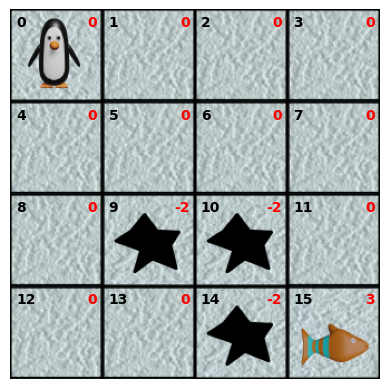

In [107]:
# We're going to work on the problem depicted in figure 19.10a
n_rows = 4; n_cols = 4
layout = np.zeros(n_rows * n_cols)
rewards = np.zeros(n_rows * n_cols)
layout[9] = 1 ; rewards[9] = -2
layout[10] = 1; rewards[10] = -2
layout[14] = 1; rewards[14] = -2
layout[15] = 2; rewards[15] = 3
initial_state = 0
mdp_drawer = DrawMDP(n_rows, n_cols)
mdp_drawer.draw(layout, state = initial_state, rewards=rewards, draw_state_index = True)

For clarity, the black numbers are the state number and the red numbers are the reward for being in that state.  Note that the states are indexed from 0 rather than 1 as in the book to make the code neater.

Define a step from the Markov process

Now let's define the state transition function $Pr(s_{t+1}|s_{t},a)$ in full where $a$ is the actions.  Here $a=0$ means try to go upward, $a=1$, right, $a=2$ down and $a=3$ right.  However, the ice is slippery, so we don't always go the direction we want to.

Note that as for the states, we've indexed the actions from zero (unlike in the book) so they map to the indices of arrays better

In [5]:
transition_probabilities_given_action0 = np.array(\
[[0.00 , 0.33, 0.00, 0.00,  0.50, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.50 , 0.00, 0.33, 0.00,  0.00, 0.50, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.33, 0.00, 0.50,  0.00, 0.00, 0.50, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.33, 0.00,  0.00, 0.00, 0.00, 0.50,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.50 , 0.00, 0.00, 0.00,  0.00, 0.17, 0.00, 0.00,   0.50, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.34, 0.00, 0.00,  0.25, 0.00, 0.17, 0.00,   0.00, 0.50, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.34, 0.00,  0.00, 0.17, 0.00, 0.25,   0.00, 0.00, 0.50, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.50,  0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.50,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.25, 0.00, 0.00, 0.00,   0.00, 0.17, 0.00, 0.00,   0.75, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.16, 0.00, 0.00,   0.25, 0.00, 0.17, 0.00,   0.00, 0.50, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.16, 0.00,   0.00, 0.17, 0.00, 0.25,   0.00, 0.00, 0.50, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.75 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.25, 0.00, 0.00, 0.00,   0.00, 0.25, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.16, 0.00, 0.00,   0.25, 0.00, 0.25, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.16, 0.00,   0.00, 0.25, 0.00, 0.25 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.25, 0.00 ],
])

transition_probabilities_given_action1 = np.array(\
[[0.00 , 0.25, 0.00, 0.00,  0.25, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.75 , 0.00, 0.25, 0.00,  0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.50, 0.00, 0.50,  0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.50, 0.00,  0.00, 0.00, 0.00, 0.33,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.25 , 0.00, 0.00, 0.00,  0.00, 0.17, 0.00, 0.00,   0.25, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.25, 0.00, 0.00,  0.50, 0.00, 0.17, 0.00,   0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.25, 0.00,  0.00, 0.50, 0.00, 0.33,   0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.50,  0.00, 0.00, 0.50, 0.00,   0.00, 0.00, 0.00, 0.33,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.25, 0.00, 0.00, 0.00,   0.00, 0.17, 0.00, 0.00,   0.25, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.16, 0.00, 0.00,   0.50, 0.00, 0.17, 0.00,   0.00, 0.25, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.16, 0.00,   0.00, 0.50, 0.00, 0.33,   0.00, 0.00, 0.25, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.34,   0.00, 0.00, 0.50, 0.00,   0.00, 0.00, 0.00, 0.50 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.25, 0.00, 0.00, 0.00,   0.00, 0.25, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.16, 0.00, 0.00,   0.75, 0.00, 0.25, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.16, 0.00,   0.00, 0.50, 0.00, 0.50 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.34,   0.00, 0.00, 0.50, 0.00 ],
])

transition_probabilities_given_action2 = np.array(\
[[0.00 , 0.25, 0.00, 0.00,  0.25, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.25 , 0.00, 0.25, 0.00,  0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.25, 0.00, 0.25,  0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.25, 0.00,  0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.75 , 0.00, 0.00, 0.00,  0.00, 0.17, 0.00, 0.00,   0.25, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.50, 0.00, 0.00,  0.25, 0.00, 0.17, 0.00,   0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.50, 0.00,  0.00, 0.16, 0.00, 0.25,   0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.75,  0.00, 0.00, 0.16, 0.00,   0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.50, 0.00, 0.00, 0.00,   0.00, 0.17, 0.00, 0.00,   0.50, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.50, 0.00, 0.00,   0.25, 0.00, 0.17, 0.00,   0.00, 0.33, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.50, 0.00,   0.00, 0.16, 0.00, 0.25,   0.00, 0.00, 0.33, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.50,   0.00, 0.00, 0.16, 0.00,   0.00, 0.00, 0.00, 0.50 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.50, 0.00, 0.00, 0.00,   0.00, 0.33, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.50, 0.00, 0.00,   0.50, 0.00, 0.33, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.50, 0.00,   0.00, 0.34, 0.00, 0.50 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.50,   0.00, 0.00, 0.34, 0.00 ],
])

transition_probabilities_given_action3 = np.array(\
[[0.00 , 0.25, 0.00, 0.00,  0.33, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.50 , 0.00, 0.25, 0.00,  0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.50, 0.00, 0.75,  0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.50, 0.00,  0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.50 , 0.00, 0.00, 0.00,  0.00, 0.50, 0.00, 0.00,   0.33, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.25, 0.00, 0.00,  0.33, 0.00, 0.50, 0.00,   0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.25, 0.00,  0.00, 0.17, 0.00, 0.50,   0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.25,  0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.34, 0.00, 0.00, 0.00,   0.00, 0.50, 0.00, 0.00,   0.50, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.16, 0.00, 0.00,   0.33, 0.00, 0.50, 0.00,   0.00, 0.25, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.16, 0.00,   0.00, 0.17, 0.00, 0.50,   0.00, 0.00, 0.25, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.25 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.34, 0.00, 0.00, 0.00,   0.00, 0.50, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.16, 0.00, 0.00,   0.50, 0.00, 0.50, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.16, 0.00,   0.00, 0.25, 0.00, 0.75 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.25, 0.00 ],
])

# Store all of these in a three dimension array
# Pr(s_{t+1}=2|s_{t}=1, a_{t}=3] is stored at position [2,1,3]
transition_probabilities_given_action = np.concatenate((np.expand_dims(transition_probabilities_given_action0,2),
                                                        np.expand_dims(transition_probabilities_given_action1,2),
                                                        np.expand_dims(transition_probabilities_given_action2,2),
                                                        np.expand_dims(transition_probabilities_given_action3,2)),axis=2)

In [32]:
transition_probabilities_given_action[:,0,:]

array([[0.  , 0.  , 0.  , 0.  ],
       [0.5 , 0.75, 0.25, 0.5 ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.5 , 0.25, 0.75, 0.5 ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ]])

In [24]:
for i in np.where(np.any(transition_probabilities_given_action[:,0,:] != 0, axis = 1)):
    print(i)

[1 4]


In [95]:
A = list(np.zeros(4))
A.append(1)
A

[0.0, 0.0, 0.0, 0.0, 1]

In [108]:
# Update the state values for the current policy, by making the values at at adjacent
# states compatible with the Bellman equation (equation 19.11)
def policy_evaluation(policy, state_values, rewards,  transition_probabilities_given_action, gamma):

    n_state = len(state_values)
    state_values_new = np.zeros_like(state_values)

    for state in range(n_state):
        # Special case -- bottom right is terminating state, always just rewards 3.0
        # print(f"In state {state}")
        if state == 15:
            state_values_new[state] = 3.0
            break
        else:
            # Action according to the current deterministic policy
            action = policy[state]
            action_value = 0
            
            possible_next_states = np.where(np.any(transition_probabilities_given_action[:,state,:] != 0, axis = 1))[0]
            # print(possible_next_states)
            
            # The inner sum over all possible next state given an action
            for next_state in possible_next_states:
                action_value += transition_probabilities_given_action[next_state,state,action] * state_values[next_state]
                # print(action_value)
            state_values_new[state] = rewards[state] + gamma * action_value

    return state_values_new

# Greedily choose the action that maximizes the value for each state.
def policy_improvement(state_values, rewards,  transition_probabilities_given_action, gamma):
    policy = np.zeros_like(state_values, dtype='uint8')
    for state in range(15):
        # TODO -- Write this function (from equation 19.12)
        # Replace this line
        action_values = list(np.zeros(4))

        for action in range(4):
            possible_next_states = np.where(np.any(transition_probabilities_given_action[:,state,:] != 0, axis = 1))[0]
            # print(possible_next_states)

            action_value = 0
            
            # The inner sum over all possible next state given an action
            for next_state in possible_next_states:
                action_value += transition_probabilities_given_action[next_state,state,action] * state_values[next_state]
                # print(action_value)
            
            action_values[action] = action_value

        policy[state] = np.argmax(action_values)


    return policy


# Main routine -- alternately call policy evaluation and policy improvement
def dynamic_programming(policy, state_values, rewards,  transition_probabilities_given_action, gamma, n_iter, verbose = False):

    for c_iter in range(n_iter):
        print("Iteration %d"%(c_iter))

        state_values = policy_evaluation(policy, state_values, rewards,  transition_probabilities_given_action, gamma)

        if verbose:
          print("Updated state values")
          print("Policy: ", policy)
          print("State values:", state_values)
          mdp_drawer = DrawMDP(n_rows, n_cols)
          mdp_drawer.draw(layout, policy = policy, state_values=state_values)

        policy = policy_improvement(state_values, rewards,  transition_probabilities_given_action, gamma)

        if verbose:
          print("Updated policy values")
          print("Policy:", policy)
          print("State_values", state_values)
          mdp_drawer = DrawMDP(n_rows, n_cols)
          mdp_drawer.draw(layout, policy = policy, state_values=state_values)

    return policy, state_values


Initial state


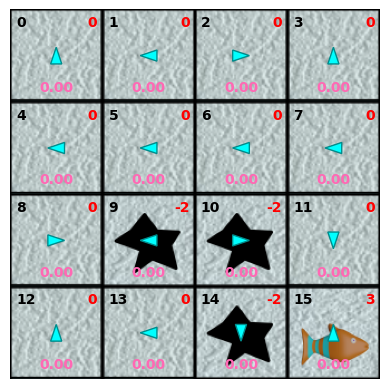

Iteration 0
Updated state values
Policy:  [0 3 1 0 3 3 3 3 1 3 1 2 0 3 2 0]
State values: [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -2. -2.  0.  0.  0. -2.  3.]


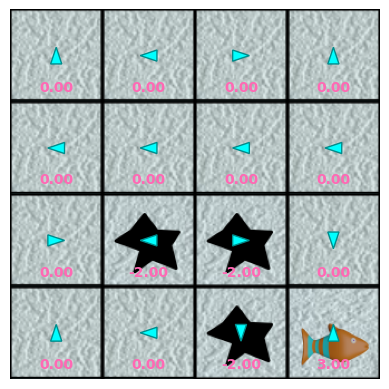

Updated policy values
Policy: [0 0 0 0 0 0 0 0 0 2 0 2 0 3 1 0]
State_values [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -2. -2.  0.  0.  0. -2.  3.]


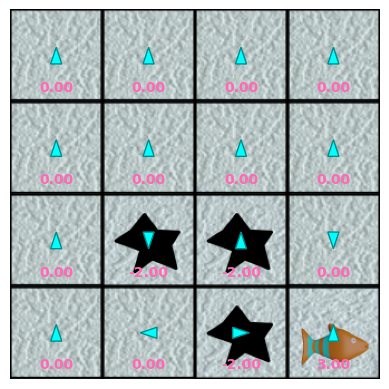

Iteration 1
Updated state values
Policy:  [0 0 0 0 0 0 0 0 0 2 0 2 0 3 1 0]
State values: [ 0.     0.     0.     0.     0.    -0.288 -0.288  0.    -0.45  -2.288
 -2.594  0.9    0.    -0.9   -1.1    3.   ]


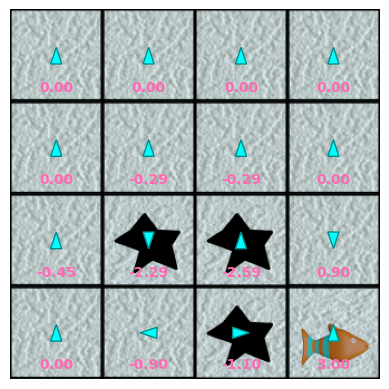

Updated policy values
Policy: [0 1 1 0 0 0 0 2 0 0 1 2 0 3 1 0]
State_values [ 0.     0.     0.     0.     0.    -0.288 -0.288  0.    -0.45  -2.288
 -2.594  0.9    0.    -0.9   -1.1    3.   ]


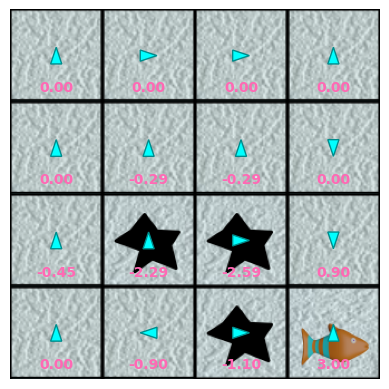

Iteration 2
Updated state values
Policy:  [0 1 1 0 0 0 0 2 0 0 1 2 0 3 1 0]
State values: [ 0.       -0.0648   -0.0648    0.       -0.16605  -0.373536 -0.4176
  0.3402   -0.5148   -2.724932 -2.147528  0.76635  -0.50625  -0.7623
 -1.43615   3.      ]


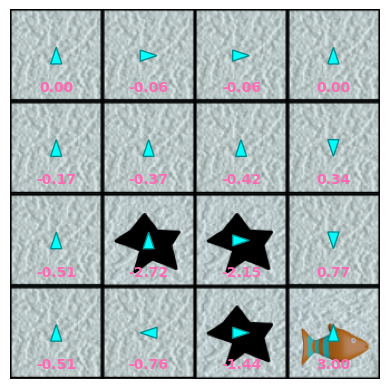

Updated policy values
Policy: [1 1 1 2 0 0 1 2 0 0 1 2 0 3 1 0]
State_values [ 0.       -0.0648   -0.0648    0.       -0.16605  -0.373536 -0.4176
  0.3402   -0.5148   -2.724932 -2.147528  0.76635  -0.50625  -0.7623
 -1.43615   3.      ]


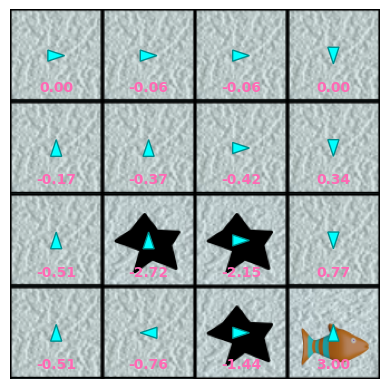

Your state values= [ 0.       -0.0648   -0.0648    0.       -0.16605  -0.373536 -0.4176
  0.3402   -0.5148   -2.724932 -2.147528  0.76635  -0.50625  -0.7623
 -1.43615   3.      ]
True values= [ 0.     0.     0.     0.     0.    -0.288 -0.288  0.    -0.45  -2.288 -2.594  0.9    0.    -0.9   -1.1    3.   ] 


In [110]:
# Set seed so random numbers always the same
np.random.seed(0)

# Let's start with by setting the policy randomly
policy = np.random.choice(size= n_rows * n_cols, a=np.arange(0,4,1))
state_values = np.zeros(n_rows* n_cols)

# Let's draw the policy first
print("Initial state")
mdp_drawer = DrawMDP(n_rows, n_cols)
mdp_drawer.draw(layout, policy = policy, rewards = rewards, state_values=state_values, draw_state_index = True)

n_iter = 3
gamma = 0.9
policy, state_values = dynamic_programming(policy, state_values, rewards, transition_probabilities_given_action, gamma, n_iter, verbose=True)

print("Your state values=", state_values)
print("True values= [ 0.     0.     0.     0.     0.    -0.288 -0.288  0.    -0.45  -2.288 -2.594  0.9    0.    -0.9   -1.1    3.   ] ", )

Now let's run it for a series of iterations without drawing.

Initial state


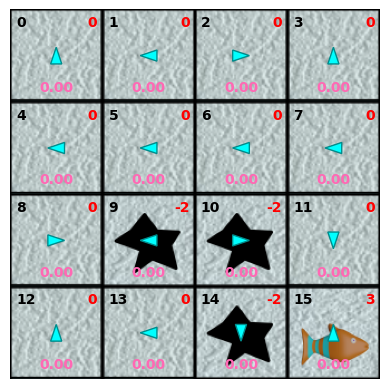

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24


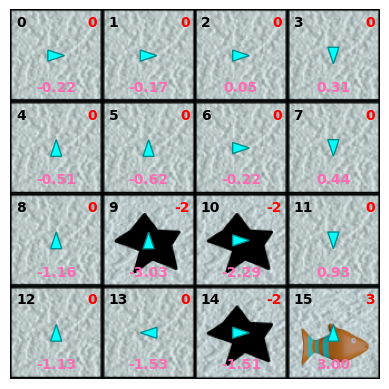

In [112]:
# Set seed so random numbers always the same
np.random.seed(0)

# Let's start with by setting the policy randomly
policy = np.random.choice(size= n_rows * n_cols, a=np.arange(0,4,1))
state_values = np.zeros(n_rows* n_cols)

# Let's draw the policy first
print("Initial state")
mdp_drawer = DrawMDP(n_rows, n_cols)
mdp_drawer.draw(layout, policy = policy, rewards = rewards, state_values=state_values, draw_state_index = True)

n_iter = 25
gamma = 0.9
policy, state_values = dynamic_programming(policy, state_values, rewards, transition_probabilities_given_action, gamma, n_iter, verbose=False)
mdp_drawer = DrawMDP(n_rows, n_cols)
mdp_drawer.draw(layout, policy = policy, rewards = rewards, state_values=state_values, draw_state_index = True)



You should see that if we start at state 13, the actions have been selected to go all the way around the holes in the ice (keeping a wide berth to avoid slipping into them) and eventually converge on the fish.